In [22]:
# Loaded variable 'df' from URI: c:\scraping data\laptopscraping\laptops_amazon.csv
import pandas as pd
df = pd.read_csv(r'c:\scraping data\laptopscraping\laptops_amazon.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                97 non-null     int64 
 1   Brand                     97 non-null     object
 2   Model Name                97 non-null     object
 3   Screen Size               97 non-null     object
 4   RAM                       88 non-null     object
 5   Storage                   97 non-null     object
 6   CPU                       96 non-null     object
 7   Operating System          97 non-null     object
 8   Price                     97 non-null     object
 9   Rating                    97 non-null     object
 10  Review Count              97 non-null     object
 11  Graphic Card Description  97 non-null     object
dtypes: int64(1), object(11)
memory usage: 9.2+ KB


In [23]:
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Brand                     97 non-null     object
 1   Model Name                97 non-null     object
 2   Screen Size               97 non-null     object
 3   RAM                       88 non-null     object
 4   Storage                   97 non-null     object
 5   CPU                       96 non-null     object
 6   Operating System          97 non-null     object
 7   Price                     97 non-null     object
 8   Rating                    97 non-null     object
 9   Review Count              97 non-null     object
 10  Graphic Card Description  97 non-null     object
dtypes: object(11)
memory usage: 8.5+ KB


In [24]:
def clear_ram(x):
    x = str(x).strip()
    if x == "No RAM":
        return 0
    elif 'GB' in x:
        result = x.replace('GB', '').strip()
        return int(result)
    return 0

df['RAM'] = df['RAM'].apply(clear_ram)


def clean_graphic(x):
    if x == 'No graphic card description':
        return int(0)
    elif x == 'Integrateg':
        return int(1)
    else:
        return int(2)
    
df['Graphic Card Description'] = df['Graphic Card Description'].apply(clean_graphic)

def clear_review(x):
    if x == 'No review count':
        return 0
    x = str(x).strip()
    if 'ratings' in x and ',' in x:
        result = x.replace('ratings', '')
        result = result.replace(',', '').strip()
        return int(result)
    elif 'ratings' in x and ',' not in x:
        result = x.replace('ratings', '').strip()
        return int(result)
    elif ',' in x:
        result = x.replace(',', '').strip()
        return int(result)
    return int(x)

df['Review Count'] = df['Review Count'].apply(clear_review)


def clear_rating(x):
    if x == "No rating":
        return 0
    elif '.' in x:
        return float(x)

df['Rating'] = df['Rating'].apply(clear_rating)

df['CPU'] = df['CPU'].fillna('Ryzen 3')


def clear_price(x):
    if x == 'No price':
        return  0
    x = str(x).strip()
    x = x.replace(',', '').strip()
    return int(x)

df['Price'] = df['Price'].apply(clear_price)


# def clear_os(x):
#     if x == "No operating system":
#         return 0
#     elif 'Windows 11' in x:
#         return 11  # win11, win 11 home, win 11pro
#     elif 'Windows' in x:
#         return 10  # win 10
#     elif 'macOS' in x:
#         return 2
#     else:
#         return 1
    
# df['Operating System'] = df['Operating System'].apply(clear_os)


def clear_cpu(x):
    if x == "No CPU":
        return 0
    x = str(x).lower()
    if 'i3' in x or 'ryzen 3' in x:
        return 3
    elif 'i5' in x or 'ryzen 5' in x or 'ultra 5' in x:
        return 5
    elif 'i7' in x or 'ryzen 7' in x:
        return 7
    if 'i9' in x or 'ryzen 9' in x:
        return 9
    else:
        return 1
    
df['CPU'] = df['CPU'].apply(clear_cpu)


def clear_storage(x):
    if x == "No storage":
        return 0
    elif 'TB' in x:
        result = x.replace('TB', '').strip()
        return int(result) *1024
    elif 'GB' in x:
        result = x.replace('GB', '').strip()
        return int(result)
    
df['Storage'] = df['Storage'].apply(clear_storage)


def clean_screen(x):
    if x == 'No screen size':
        return 0
    elif 'Inches' in x:
        result = x.replace('Inches', '').strip()
        return float(result)
    elif 'Centimetres' in x:
        result = x.replace('Centimetres', '').strip()
        result = float(result)
        result = result // 2.54
        return round(result, 2)
    elif 'Centimetres' not in x and 'Inches' not in x:
        return float(x)
    
df['Screen Size'] = df['Screen Size'].apply(clean_screen)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     97 non-null     object 
 1   Model Name                97 non-null     object 
 2   Screen Size               97 non-null     float64
 3   RAM                       97 non-null     int64  
 4   Storage                   97 non-null     int64  
 5   CPU                       97 non-null     int64  
 6   Operating System          97 non-null     object 
 7   Price                     97 non-null     int64  
 8   Rating                    97 non-null     float64
 9   Review Count              97 non-null     int64  
 10  Graphic Card Description  97 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 8.5+ KB


In [26]:
#1-gepotiza
#   Yuqori narxdagi noutbuklar odatda yuqori mijozlar reytingiga ega
#2-gepotiza
#   HP va Dell kabi yuqori darajadagi noutbuk brendlari kamroq taniqli brendlarga qaraganda yuqori o'rtacha reytinglarga ega.
#3-gepotiza
#   Kattaroq ekranli (15 dyuym va undan yuqori) noutbuklar kichikroq ekranga qaraganda yaxshiroq mijozlar reytingiga ega
#   o'lchamlari (14 dyuym va undan past).
#4-gepotiza
#   Windows 11 bilan ishlaydigan noutbuklar eski versiyalari (masalan, Windows 10) bilan ishlaydiganlarga qaraganda yuqori reytingga ega.
#5-gepotiza
#   Mijozlarning sharhlari ko'proq bo'lgan noutbuklar odatda yuqori umumiy reytinglarga ega.
#6-gepotiza
#   O'rtacha narxdagi ($ 500-800) noutbuklar byudjet yoki premium modellarga qaraganda yuqori baholarga ega.

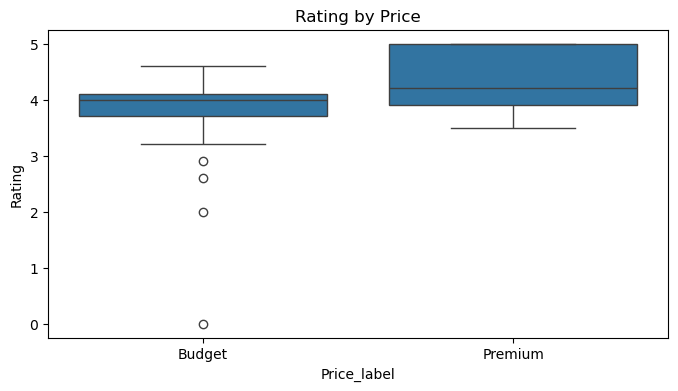

In [27]:
prices = [0, 80000, 150000]
price_label = ['Budget', 'Premium']
df['Price_label'] = pd.cut(df['Price'], bins=prices, labels=price_label)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 4))
sns.boxplot(x='Price_label', y='Rating', data=df)
plt.title('Rating by Price')
plt.show()

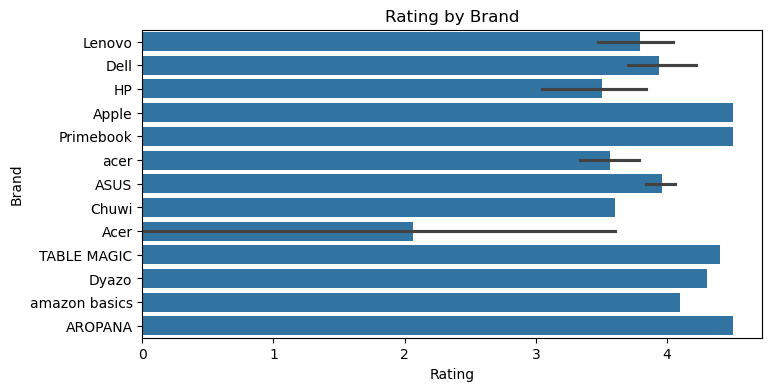

In [29]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Rating', y='Brand', data=df)
plt.title('Rating by Brand')
plt.show()

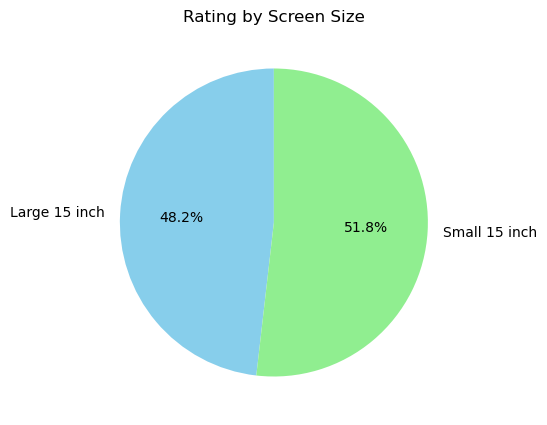

In [31]:
df['Screen Size Group'] = np.where(df['Screen Size'] > 15, 'Large 15 inch', 'Small 15 inch')
screen_size = df.groupby('Screen Size Group')['Rating'].mean()

plt.figure(figsize=(8, 5))
plt.pie(screen_size, labels=screen_size.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Rating by Screen Size')
plt.show()

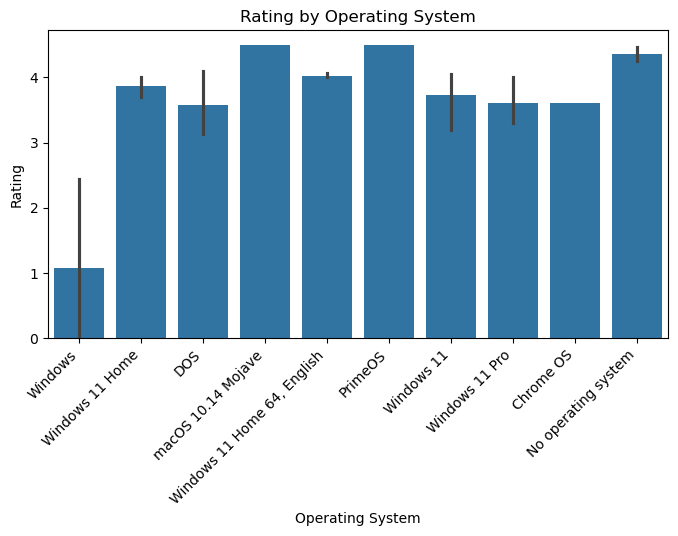

In [33]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Operating System', y='Rating', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Rating by Operating System')
plt.show()

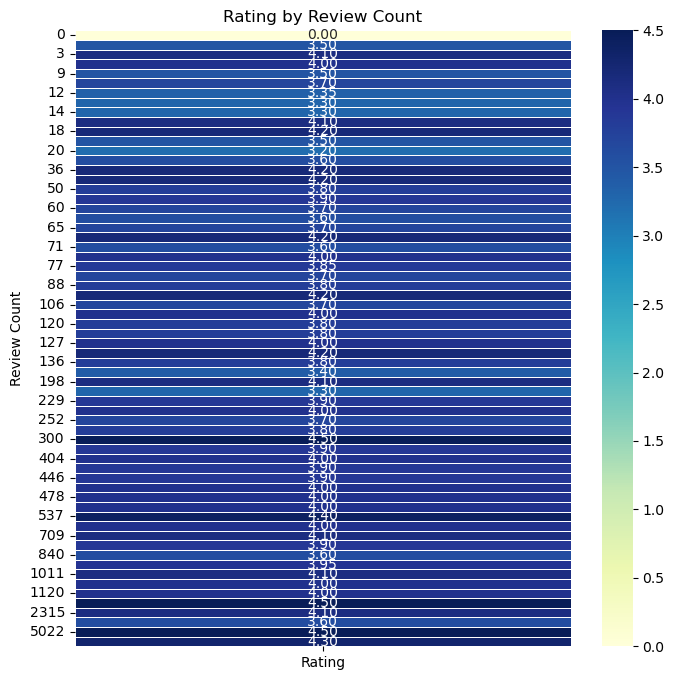

In [34]:
h = df.pivot_table(values='Rating', index='Review Count', aggfunc='mean')
plt.figure(figsize=(8, 8))
sns.heatmap(h, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Rating by Review Count')
plt.show()

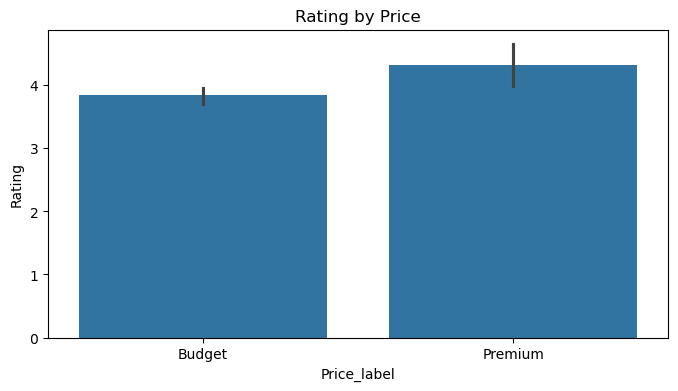

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Price_label', y='Rating', data=df)
plt.title('Rating by Price')
plt.show()

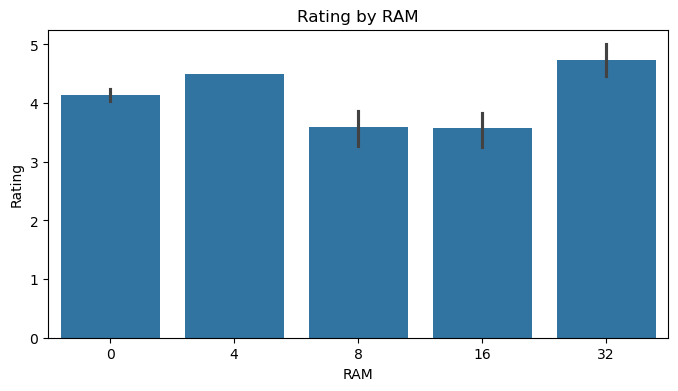

In [37]:
plt.figure(figsize=(8, 4))
sns.barplot(x='RAM', y='Rating', data=df)
plt.title('Rating by RAM')
plt.show()

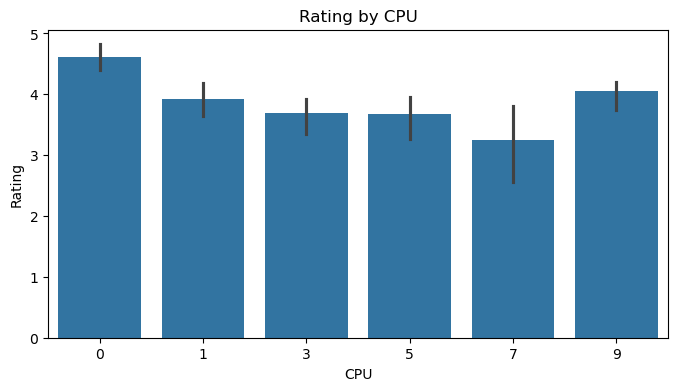

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(x='CPU', y='Rating', data=df)
plt.title('Rating by CPU')
plt.show()